## **Introduction to Knowledge Graph with the `networkx` Package in Python – Part 2**

In this second part of our Knowledge Graph tutorial using the `networkx` library, we move beyond the basics and dive into building more meaningful and insightful graph structures. This part focuses on **enriching graphs with metadata**, **visualizing relationships**, and **applying key graph algorithms** to better understand the structure and flow of knowledge.

You’ll learn how to:

* Create and visualize both undirected and directed graphs
* Add nodes and edges incrementally to model learning paths
* Annotate nodes with descriptive attributes such as difficulty level and topic description
* Attach metadata to edges, including weights and prerequisite flags
* Customize graph visualizations to include node attributes and edge labels
* Build structured learning paths that resemble real-world knowledge hierarchies

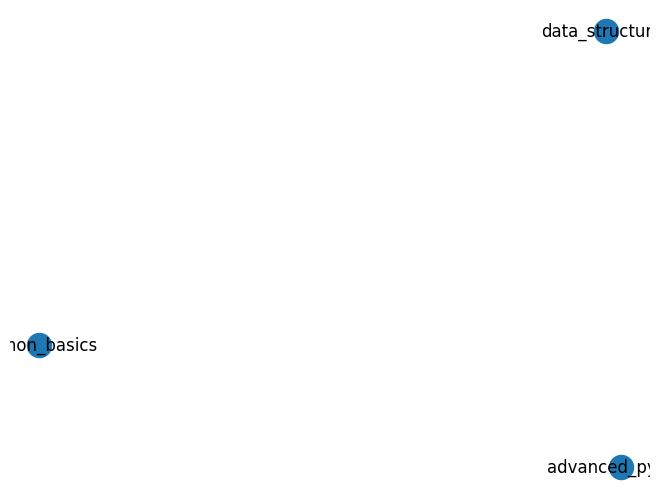

In [1]:
import networkx as nx
from matplotlib import pyplot as plt

# Create different types of graphs
G = nx.Graph()              # Undirected graph

# Adding nodes
G.add_node('python_basics')

G.add_nodes_from(['data_structures', 'advanced_python'])

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

##### **Now that we've added individual nodes to represent topics, the next step is to define the relationships between them using edges.**

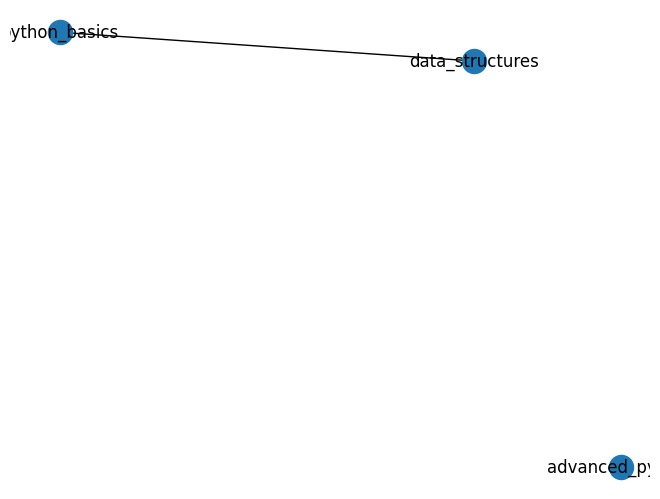

In [2]:
# Adding edges
G.add_edge('python_basics', 'data_structures')

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

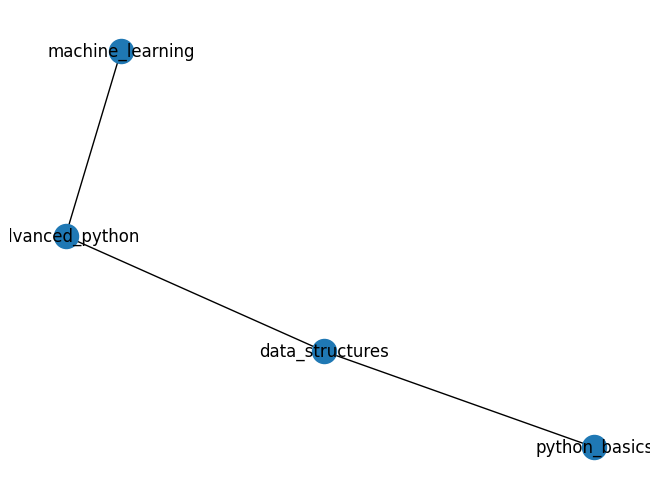

In [3]:
# Let's add more Edges
G.add_edges_from([
    ('data_structures', 'advanced_python'),
    ('advanced_python', 'machine_learning')
])

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

To turn a simple graph into a meaningful **knowledge graph**, we enrich it with extra information about each topic (node) and relationship (edge). This helps us model a structured learning path.

* **Nodes** represent topics, each tagged with a **difficulty level** (`beginner`, `intermediate`, `advanced`, or `expert`) and a short **description**.
* **Edges** show which topics depend on others. Each edge has a **weight** (how important the connection is) and a **prerequisite flag** (whether it's required learning).

These attributes make the graph more useful and readable. For example, difficulty levels can help color-code topics, and edge labels make the learning flow easier to follow.

We’ll now build and visualize this enriched graph to clearly show the structure of our learning journey.

In [4]:
# Node attributes: describe each topic with difficulty and a short description
topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Data structures in Python'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python techniques'},
    'machine_learning': {'difficulty': 'expert', 'description': 'Introduction to ML'}
}

# Assign node attributes to the graph
for node, attrs in topics.items():
    G.nodes[node].update(attrs)

In [5]:
# Edge attributes: describe each relationship with a weight and prerequisite flag
edge_attributes = {
    ('python_basics', 'data_structures'): {'weight': 1.0, 'prerequisite': True},
    ('data_structures', 'advanced_python'): {'weight': 1.5, 'prerequisite': True},
    ('advanced_python', 'machine_learning'): {'weight': 2.0, 'prerequisite': True}
}

# Assign edge attributes to the graph
for edge, attrs in edge_attributes.items():
    G.edges[edge].update(attrs)

In [6]:
print(G.nodes())             # All nodes
print(G.edges())             # All edges

['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
[('python_basics', 'data_structures'), ('data_structures', 'advanced_python'), ('advanced_python', 'machine_learning')]


In [7]:
print(G.nodes(data=True))             # All nodes and Attribute dictionary
print(G.edges(data=True))             # All edges and Attribute dictionary

[('python_basics', {'difficulty': 'beginner', 'description': 'Basic Python concepts'}), ('data_structures', {'difficulty': 'intermediate', 'description': 'Data structures in Python'}), ('advanced_python', {'difficulty': 'advanced', 'description': 'Advanced Python techniques'}), ('machine_learning', {'difficulty': 'expert', 'description': 'Introduction to ML'})]
[('python_basics', 'data_structures', {'weight': 1.0, 'prerequisite': True}), ('data_structures', 'advanced_python', {'weight': 1.5, 'prerequisite': True}), ('advanced_python', 'machine_learning', {'weight': 2.0, 'prerequisite': True})]


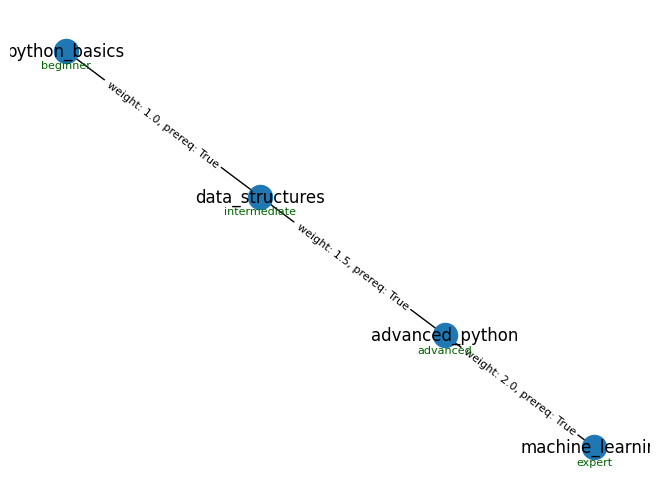

In [8]:
# Visualize the updated graph
pos = nx.spring_layout(G)

# Draw nodes with labels
nx.draw(G, pos, with_labels=True)

# Show difficulty level below each node
node_labels = {node: data['difficulty'] for node, data in G.nodes(data=True)}
for node, (x, y) in pos.items():
    plt.text(x, y - 0.05, node_labels[node], fontsize=8, ha='center', color='darkgreen')

# Show edge weight and prerequisite info
edge_labels = {(u, v): f"weight: {d['weight']}, prereq: {d['prerequisite']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.show()

Now that we've explored how to enrich a graph with metadata and basic labels, let’s take it a step further by building a more **refined and visually informative curriculum map** from scratch.

In this version:

* We define a new directed graph representing topics and their learning dependencies.
* Each node is **color-coded** based on its difficulty level for quick visual interpretation.
* **Arrows** show the direction of learning, making it clear which topic leads to the next.
* **Edge weights** highlight the importance of each prerequisite link.
* A **legend** helps interpret the color scheme.

This enhanced visualization provides a cleaner, more professional view of the learning path, making it easier to understand and follow the progression from beginner to advanced topics.

In [ ]:
# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7})
]

# Create the directed graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

**Now let’s visualize this graph with custom styling:**

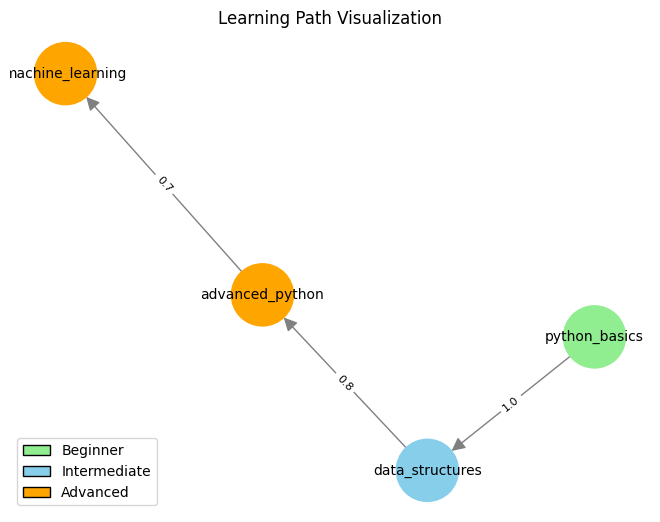

In [10]:
# Define node positions using a spring layout
pos = nx.spring_layout(G)

# Assign node colors based on difficulty
node_colors = {
    'beginner': 'lightgreen',
    'intermediate': 'skyblue',
    'advanced': 'orange'
}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

# Draw the graph with custom node colors and arrows
nx.draw(
    G, pos, with_labels=True, node_color=node_color_list,
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
)

# Add edge labels to display weights
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add a color legend to explain difficulty levels
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Beginner'),
    Patch(facecolor='skyblue', edgecolor='black', label='Intermediate'),
    Patch(facecolor='orange', edgecolor='black', label='Advanced')
]
plt.legend(handles=legend_elements, loc='lower left')

plt.title("Learning Path Visualization", fontsize=12)
plt.show()

### **Basic Graph Analysis**

Once a graph is constructed, the next important step is to **analyze its structure**.
NetworkX provides several easy-to-use functions that help you extract useful insights from your graph.

Let's some **basic metrics** that tell us:

* How many topics (nodes) and relationships (edges) exist
* Which topics are connected
* How connected a particular node is (its degree)

These simple metrics lay the groundwork for more advanced algorithms, such as shortest paths, centrality, and community detection.

Let’s take a look at how to compute these using our learning graph:


In [11]:
# Get basic information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Get node neighbors
print(f"Neighbors of python_basics: {list(G.neighbors('python_basics'))}")

# Get node degree
print(f"Degree of data_structures: {G.degree['data_structures']}")

Number of nodes: 4
Number of edges: 3
Neighbors of python_basics: ['data_structures']
Degree of data_structures: 2
